In [91]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [71]:
df = pd.read_csv('vehicles.csv')
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,female,NaN,bicycle
1,8,male,NaN,scooter
2,10,female,NaN,bicycle
3,14,male,NaN,metro
4,16,male,NaN,metro
5,18,female,NaN,metro
6,20,male,200.0,scooter
7,22,female,500.0,scooter


In [72]:
df.dtypes

Age                     int64
Gender                 object
Income                float64
Favorite Transport     object
dtype: object

## Cleaning

In [73]:
df.isnull().sum()

Age                   0
Gender                0
Income                6
Favorite Transport    0
dtype: int64

In [74]:
df.fillna({"Income": 0.0}, inplace=True)
df.head()

,Age,Gender,Income,Favorite Transport
0,5,female,0.0,bicycle
1,8,male,0.0,scooter
2,10,female,0.0,bicycle
3,14,male,0.0,metro
4,16,male,0.0,metro


In [75]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Favorite Transport    0
dtype: int64

## Encoding

In [76]:
df['Gender'].unique()

array(['female', 'male'], dtype=object)

In [77]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,Age,Gender,Income,Favorite Transport
0,5,0,0.0,bicycle
1,8,1,0.0,scooter
2,10,0,0.0,bicycle
3,14,1,0.0,metro
4,16,1,0.0,metro


## Model

In [78]:
X = df.drop(columns='Favorite Transport')
X.head()

,Age,Gender,Income
0,5,0,0.0
1,8,1,0.0
2,10,0,0.0
3,14,1,0.0
4,16,1,0.0


In [79]:
y = df['Favorite Transport']
y.head()

0    bicycle
1    scooter
2    bicycle
3      metro
4      metro
Name: Favorite Transport, dtype: object

In [80]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

## Prediction

In [81]:
test_df = pd.DataFrame({
    'Age': [12, 30, 75],
    'Gender': [0, 0, 1],
    'Income': [0.0, 4000, 50000]
})
test_df

,Age,Gender,Income
0,12,0,0.0
1,30,0,4000.0
2,75,1,50000.0


In [82]:
model.predict(test_df)

array(['bicycle', 'car', 'helicopter'], dtype=object)

## Exporting to the DOT file

In [83]:
tree.export_graphviz(model, out_file='decision_tree_model.dot', feature_names=['Age', 'Gender', 'Income'], filled=True, class_names=sorted(y.unique()))

## Evaluation

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.shape

(26, 3)

In [85]:
X_train.shape

(20, 3)

In [86]:
X_test.shape

(6, 3)

In [87]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [88]:
X_test

,Age,Gender,Income
15,47,0,6000.0
12,33,1,7000.0
21,64,1,6500.0
2,10,0,0.0
8,23,1,300.0
4,16,1,0.0


In [89]:
predictions = model.predict(X_test)
predictions

array(['car', 'car', 'car', 'scooter', 'scooter', 'metro'], dtype=object)

In [90]:
model_accuracy_score = accuracy_score(y_test, predictions)
model_accuracy_score

0.8333333333333334

## Charts

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

<function matplotlib.pyplot.show(close=None, block=None)>

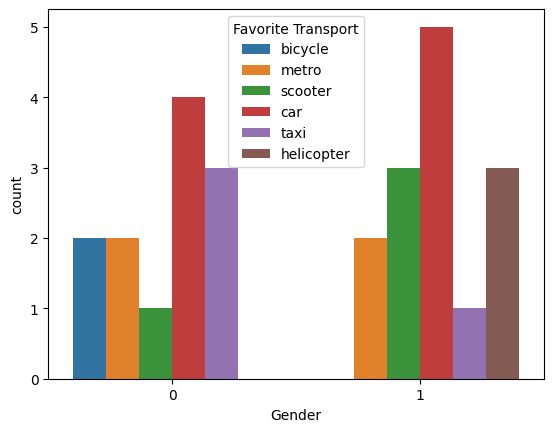

In [92]:
sns.countplot(x=df['Gender'], hue=df['Favorite Transport'])
plt.show

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

<function matplotlib.pyplot.show(close=None, block=None)>

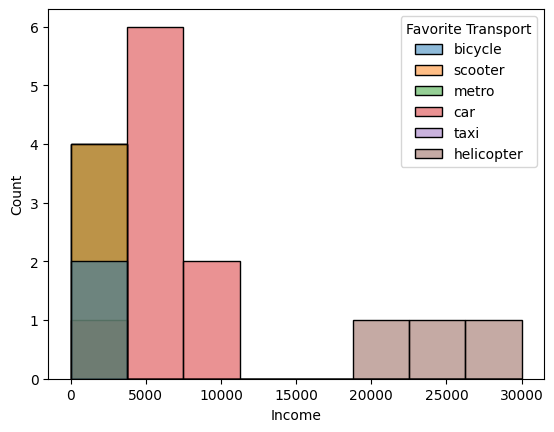

In [93]:
sns.histplot(x=df['Income'], hue=df['Favorite Transport'])
plt.show